# Aim: To Run Lasso Regression on the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [4]:
import sys
import os
import math
import csv
import json

## Helper Methods and Variables

In [5]:
def sentence_to_snake_case(sentence):
    # Split the sentence into words, convert to lowercase, and join with underscores
    snake_case = '_'.join(word.lower() for word in sentence.split())
    return snake_case

In [6]:
useless_cols = ['CustomerID', 'Count', 'Country', 'State', 'City', \
                'Zip Code', 'Lat Long', 'Churn Score', 'Churn Label', 'CLTV', 'Churn Reason', 'Total Charges']

In [7]:
y_cols = ['Churn Value', 'Tenure Months']

## Prepare the Data

In [8]:
os.getcwd()

'C:\\D Drive\\University of Washington\\Study\\Quarter 2\\DATA 557\\Project\\ML'

In [9]:
data = pd.read_csv('../data/Telco_customer_churn_cleaned.csv')

In [10]:
data.head()

,Unnamed: 0,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [11]:
# data.columns

In [12]:
# data.head()

In [13]:
data.shape

(7043, 34)

In [14]:
data = data.rename(columns = lambda column: sentence_to_snake_case(column))

In [15]:
data.head()

,unnamed:_0,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,...,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
0,0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [16]:
# Leaving in Customer ID just in case
useless_cols = [sentence_to_snake_case(column) for column in useless_cols]

In [17]:
y_cols = [sentence_to_snake_case(column) for column in y_cols]

In [18]:
y_cols

['churn_value', 'tenure_months']

In [19]:
# Drop the first column "Unnamed" and the useless columns
data = data.drop([data.columns[0]] + useless_cols, axis=1)

In [20]:
data.head()

,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn_value
0,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
1,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1
2,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,1
3,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,1
4,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,1


In [21]:
# data.dtypes

## Get either the best case or worst case scenario

### The data being set from here will decide how the model will treat its unknown churn customers

**Our y is a check on whether the user will churn within 12 months or not**

In [22]:
def best_case_churn(row):
    # User has definitely not churned within the 12 months
    if row['tenure_months'] >= 12: return 0
    # User has definitely churned within the 12 months
    if row['tenure_months'] < 12 and row['churn_value'] == 1: return 1
    # Best case assumption
    return 0

In [23]:
def worst_case_churn(row):
    # User has definitely not churned within the 12 months
    if row['tenure_months'] >= 12: return 0
    # User has definitely churned within the 12 months
    if row['tenure_months'] < 12 and row['churn_value'] == 1: return 1
    # Best case assumption
    return 1

### Switch the following line to switch between best case and worst case

In [24]:
main_y_col = 'churn'

In [25]:
data[main_y_col] = data.apply(worst_case_churn, axis=1)

In [26]:
data['tenure_months'].unique()

array([ 2,  8, 28, 49, 10,  1, 47, 17,  5, 34, 11, 15, 18,  9,  7, 12, 25,
       68, 55, 37,  3, 27, 20,  4, 58, 53, 13,  6, 19, 59, 16, 52, 24, 32,
       38, 54, 43, 63, 21, 69, 22, 61, 60, 48, 40, 23, 39, 35, 56, 65, 33,
       30, 45, 46, 62, 70, 50, 44, 71, 26, 14, 41, 66, 64, 29, 42, 67, 51,
       31, 57, 36, 72,  0], dtype=int64)

In [27]:
y_cols.extend([main_y_col])
data[y_cols]

,churn_value,tenure_months,churn
0,1,2,1
1,1,2,1
2,1,8,1
3,1,28,0
4,1,49,0
...,...,...,...
7038,0,72,0
7039,0,24,0
7040,0,72,0
7041,0,11,1


In [28]:
y_cols

['churn_value', 'tenure_months', 'churn']

## Divide the dataset into train and test test

In [29]:
RNG = np.random.RandomState(seed=420)

In [30]:
train, test = train_test_split(data, test_size=0.1, shuffle=True, random_state=RNG)

In [31]:
train.shape

(6338, 22)

In [32]:
test.shape

(705, 22)

## Pre-process the data

### Normalize

**Remember to save normalization details of train data, to apply to test data**

Pipeline transforms automatically do so for us.

In [33]:
dtypes = data.dtypes

In [34]:
# Prepare to Standardize all numeric columns except Churn Value
numeric_cols = list(data.select_dtypes(include=['int64', 'float64']))
numeric_cols = [column for column in numeric_cols if column not in y_cols]
numeric_cols

['latitude', 'longitude', 'monthly_charges']

In [35]:
# Pipeline is to maintain consistency
standardization_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [36]:
# ColumnTransformer helps standardize only selected columns
preprocessor = ColumnTransformer(
    transformers=[('num', standardization_transformer, numeric_cols)],
    remainder='passthrough'  # This leaves the rest of the columns in the dataset unchanged
)

In [37]:
preprocessed_train_array = preprocessor.fit(train).transform(train)

In [38]:
# train

Convert the preprocessed arrays into pandas dataframe, by taking into account the correct column names, and the correct column types.

In [39]:
preprocessed_columns = [col.split('__')[1] for col in preprocessor.get_feature_names_out()]
# preprocessed_columns

## Warning!! Bad Coding Practice Alert

In [40]:
# Instead of mapping preprocessed_columns with the old data.columns and getting the dtypes
# for now we will proceed with hard-coding logic
# Because columns that have prefix num are obviously float
# While other columns are either object or can be treated as object (except Churn Value which will separately be made int64)
preprocessed_column_types = ['float64' if col.split('__')[0]=='num' else 'object' for col in preprocessor.get_feature_names_out()]

In [41]:
preprocessed_column_types[-1] = 'int64'

In [42]:
preprocessed_column_dtypes = {preprocessed_columns[i]: preprocessed_column_types[i] for i in range(len(preprocessed_columns))}

In [43]:
preprocessed_train = pd.DataFrame(data=preprocessed_train_array, columns=preprocessed_columns)
preprocessed_train = preprocessed_train.astype(preprocessed_column_dtypes)

In [44]:
preprocessed_train.head()

,latitude,longitude,monthly_charges,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_value,churn
0,-0.498158,-0.371946,1.295086,Male,No,Yes,Yes,60,Yes,Yes,...,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),0,0
1,-1.423199,1.358143,-1.516232,Female,No,No,No,20,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),0,0
2,0.444907,-1.026476,0.965322,Male,No,No,No,17,Yes,No,...,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,1,0
3,1.202459,-0.117674,-1.514566,Female,No,No,No,29,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0,0
4,-0.899465,0.660012,0.653879,Female,No,No,No,49,Yes,Yes,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,0,0


In [45]:
# preprocessed_train.dtypes

In [46]:
preprocessed_test_array = preprocessor.transform(test)

In [47]:
preprocessed_test = pd.DataFrame(data=preprocessed_test_array, columns=preprocessed_columns)
preprocessed_test = preprocessed_test.astype(preprocessed_column_dtypes)

In [48]:
preprocessed_test.head()

,latitude,longitude,monthly_charges,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_value,churn
0,1.077896,-1.383298,1.331726,Female,Yes,Yes,No,62,Yes,Yes,...,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,0,0
1,-0.903949,0.703809,-1.479591,Male,No,No,No,47,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0,0
2,-0.863037,0.738054,-0.165534,Male,No,No,No,9,Yes,Yes,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,0,1
3,0.495985,-1.031974,0.868725,Female,Yes,No,No,32,Yes,No,...,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,0,0
4,0.898898,-0.799467,0.184215,Female,No,No,No,4,Yes,No,...,No,No,No,No,No,Month-to-month,No,Electronic check,1,1


In [49]:
# preprocessed_test.dtypes

### Split Datasets into X and y

(Not useful if using statsmodels api)

In [50]:
X_columns = list(preprocessed_train.columns)

In [51]:
X_columns = [column for column in X_columns if column not in y_cols]

In [52]:
# X_columns

In [53]:
X_train, y_train = preprocessed_train[X_columns], preprocessed_train[main_y_col]

In [54]:
X_test, y_test = preprocessed_test[X_columns], preprocessed_test[main_y_col]

### Dimensionality Reduction?

Maybe later. Not relevant to Lasso Regression

## Run Lasso Logistic Regression

In [55]:
# preprocessed_column_types

In [56]:
# preprocessed_train_array

In [57]:
# preprocessed_train.dtypes

In [58]:
preprocessed_train.columns

Index(['latitude', 'longitude', 'monthly_charges', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'churn_value', 'churn'],
      dtype='object')

In [59]:
def formulaGenerator(data, y_cols = [''], main_y_col=''):
    x_cols = [column for column in list(data.columns) if column not in y_cols]
    formula = f'{main_y_col} ~'
    for index, column in enumerate(x_cols):
        if index != 0: formula = f'{formula} +'
        if data.dtypes[column] in ['int64', 'float64']: formula = f'{formula} {column}'
        else: formula = f'{formula} C({column})'
    return formula

In [60]:
formula = formulaGenerator(preprocessed_train, y_cols, main_y_col)
formula

'churn ~ latitude + longitude + monthly_charges + C(gender) + C(senior_citizen) + C(partner) + C(dependents) + C(phone_service) + C(multiple_lines) + C(internet_service) + C(online_security) + C(online_backup) + C(device_protection) + C(tech_support) + C(streaming_tv) + C(streaming_movies) + C(contract) + C(paperless_billing) + C(payment_method)'

In [61]:
model = smf.logit(formula = formula, data = preprocessed_train)
results = model.fit_regularized(method='l1', alpha=10, QC_verbose=False)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3928285859820894
            Iterations: 108
            Function evaluations: 108
            Gradient evaluations: 108


In [62]:
# results.summary()

In [63]:
param_grid = {'alpha': np.logspace(-5, 3, 100)}

In [64]:
param_list = list(ParameterGrid(param_grid))

In [65]:
# param_list

In [66]:
coefficients = None

In [67]:
for params in param_list:
    # Fit the model with the given parameters
    try:
        results = model.fit_regularized(method='l1', QC_verbose=False, **params)
    except:
        print(params)
    
    # Store the coefficients
    row = pd.DataFrame(results.params).transpose()
    row = pd.concat([row, pd.DataFrame.from_dict({'regularization': [params['alpha']]})], axis=1)
    if coefficients is None: 
        coefficients = row
    else: 
        coefficients = pd.concat([coefficients, row], ignore_index=True)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3712034327299626
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37120344236329955
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 31 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 31 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37120345396603893
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119
{'alpha': 1.4508287784959402e-05}
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3712034679406379
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 31 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 31 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.371203484771726
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.371203505042849
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 31 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 31 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.371203529456613
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37120355885890627
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 31 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 31 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37120359426801947
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37120363690963987
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 31 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 31 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3712036882588808
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119
{'alpha': 6.428073117284319e-05}
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3712037500907355
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 31 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3712038245405977
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37120391417679394
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119
{'alpha': 0.00011233240329780277}


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37120402208741865
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3712041519841564
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 28 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 29 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37120430832621015
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37120449646792786
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 22 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 22 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37120472283420763
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119
{'alpha': 0.0002848035868435802}
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3712049951282185
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 20 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 19 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.371205322576328
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37120571621522114
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 18 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 17 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3712061892257556
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.371206757316598
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 17 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 18 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37120744078780044
            Iterations: 119
            Function evaluations: 120
            Gradient evaluations: 119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37120826117189315
            Iterations: 119
            Function evaluations: 119
            Gradient evaluations: 119


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 20 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 16 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.371209246397273
            Iterations: 121
            Function evaluations: 122
            Gradient evaluations: 121
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3712104271536106
            Iterations: 123
            Function evaluations: 123
            Gradient evaluations: 123
{'alpha': 0.0015199110829529348}


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 19 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 21 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37121183950463926
            Iterations: 124
            Function evaluations: 124
            Gradient evaluations: 124
{'alpha': 0.0018307382802953698}
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3712135288385496
            Iterations: 123
            Function evaluations: 123
            Gradient evaluations: 123


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 23 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 21 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3712155421024222
            Iterations: 122
            Function evaluations: 122
            Gradient evaluations: 122
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37121792905313467
            Iterations: 121
            Function evaluations: 122
            Gradient evaluations: 121


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 28 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 24 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3712207272980118
            Iterations: 138
            Function evaluations: 138
            Gradient evaluations: 138
{'alpha': 0.0038535285937105314}


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 18 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3712171679200052
            Iterations: 269
            Function evaluations: 269
            Gradient evaluations: 269
{'alpha': 0.004641588833612782}


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 17 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3712199520410121
            Iterations: 258
            Function evaluations: 258
            Gradient evaluations: 258


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 14 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37122015063162045
            Iterations: 405
            Function evaluations: 406
            Gradient evaluations: 405


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 21 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37122367467941025
            Iterations: 400
            Function evaluations: 400
            Gradient evaluations: 400


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 19 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37122697703532015
            Iterations: 433
            Function evaluations: 433
            Gradient evaluations: 433


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 9 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3712320112851667
            Iterations: 439
            Function evaluations: 439
            Gradient evaluations: 439


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 10 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3712374135838477
            Iterations: 449
            Function evaluations: 449
            Gradient evaluations: 449


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 12 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3712442682533316
            Iterations: 468
            Function evaluations: 468
            Gradient evaluations: 468


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 14 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37125238061909566
            Iterations: 469
            Function evaluations: 469
            Gradient evaluations: 469


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 18 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37126236305440524
            Iterations: 457
            Function evaluations: 458
            Gradient evaluations: 457


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 18 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37127435754861193
            Iterations: 471
            Function evaluations: 472
            Gradient evaluations: 471


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 18 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37128894418613867
            Iterations: 435
            Function evaluations: 435
            Gradient evaluations: 435
{'alpha': 0.03593813663804629}


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 17 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3713061349889185
            Iterations: 456
            Function evaluations: 456
            Gradient evaluations: 456


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37132707669285475
            Iterations: 439
            Function evaluations: 439
            Gradient evaluations: 439
{'alpha': 0.0521400828799969}


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 3 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3713523486439135
            Iterations: 424
            Function evaluations: 424
            Gradient evaluations: 424


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 6 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37138284268458704
            Iterations: 417
            Function evaluations: 417
            Gradient evaluations: 417


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 4 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3714195500515304
            Iterations: 400
            Function evaluations: 400
            Gradient evaluations: 400


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 6 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37146377007380016
            Iterations: 380
            Function evaluations: 381
            Gradient evaluations: 380


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 7 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37151707543602636
            Iterations: 351
            Function evaluations: 352
            Gradient evaluations: 351


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 7 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3715805084880335
            Iterations: 353
            Function evaluations: 353
            Gradient evaluations: 353


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 7 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37165745629517927
            Iterations: 353
            Function evaluations: 353
            Gradient evaluations: 353


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3717500704102045
            Iterations: 332
            Function evaluations: 333
            Gradient evaluations: 332


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 5 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3718615165815943
            Iterations: 324
            Function evaluations: 324
            Gradient evaluations: 324


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3719956033228865
            Iterations: 310
            Function evaluations: 310
            Gradient evaluations: 310
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37215689140567154
            Iterations: 284
            Function evaluations: 284
            Gradient evaluations: 284


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3723508448220321
            Iterations: 262
            Function evaluations: 262
            Gradient evaluations: 262
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3725839958164544
            Iterations: 256
            Function evaluations: 257
            Gradient evaluations: 256
{'alpha': 0.5857020818056673}


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37286415638617204
            Iterations: 252
            Function evaluations: 253
            Gradient evaluations: 252
{'alpha': 0.7054802310718645}
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37320064128132524
            Iterations: 236
            Function evaluations: 237
            Gradient evaluations: 236
{'alpha': 0.8497534359086456}
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37360453537792815
            Iterations: 221
            Function evaluations: 221
            Gradient evaluations: 221
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37408899826840347
            Iterations: 215
            Function evaluations: 216
            Gradient evaluations: 215
Optimization terminated successfully    (Exit mode 0)
            Current function v

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6820477625993498
            Iterations: 16
            Function evaluations: 16
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6886295220059203
            Iterations: 9
            Function evaluations: 9
            Gradient evaluations: 9


In [96]:
coefficients.head()

,Intercept,C(gender)[T.Male],C(senior_citizen)[T.Yes],C(partner)[T.Yes],C(dependents)[T.Yes],C(phone_service)[T.Yes],C(multiple_lines)[T.No phone service],C(multiple_lines)[T.Yes],C(internet_service)[T.Fiber optic],C(internet_service)[T.No],...,C(contract)[T.One year],C(contract)[T.Two year],C(paperless_billing)[T.Yes],C(payment_method)[T.Credit card (automatic)],C(payment_method)[T.Electronic check],C(payment_method)[T.Mailed check],latitude,longitude,monthly_charges,regularization
0,0.521750,-0.009951,-0.275025,-0.771735,-0.086471,0.528076,0.013798,-1.037083,-0.027340,-0.118334,...,-2.311759,-2.854067,-0.098078,0.054494,0.806790,1.188917,-0.100403,-0.068905,-0.180661,0.000010
1,0.521748,-0.009951,-0.275025,-0.771735,-0.086471,0.528076,0.013796,-1.037082,-0.027338,-0.118335,...,-2.311759,-2.854067,-0.098078,0.054494,0.806789,1.188917,-0.100403,-0.068905,-0.180664,0.000012
2,0.521748,-0.009951,-0.275025,-0.771735,-0.086471,0.528076,0.013796,-1.037082,-0.027338,-0.118335,...,-2.311759,-2.854067,-0.098078,0.054494,0.806789,1.188917,-0.100403,-0.068905,-0.180664,0.000015
3,0.521744,-0.009951,-0.275025,-0.771735,-0.086471,0.528076,0.013791,-1.037081,-0.027332,-0.118336,...,-2.311759,-2.854066,-0.098078,0.054494,0.806789,1.188917,-0.100403,-0.068905,-0.180671,0.000017
4,0.521741,-0.009951,-0.275025,-0.771735,-0.086471,0.528076,0.013788,-1.037080,-0.027328,-0.118336,...,-2.311758,-2.854066,-0.098078,0.054493,0.806789,1.188917,-0.100403,-0.068905,-0.180676,0.000021


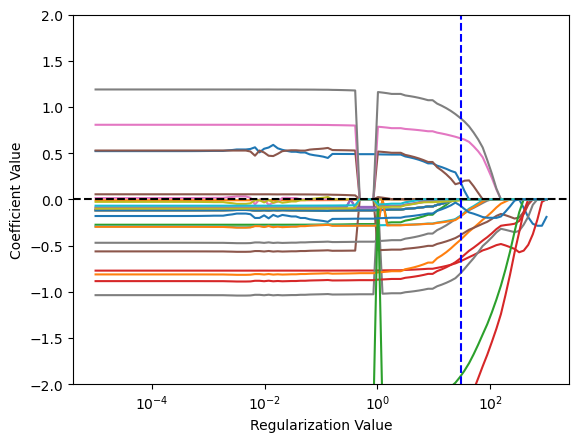

In [97]:
coefficients.plot(x='regularization', logx=True, xlabel='Regularization Value', ylabel='Coefficient Value', kind='line', legend=False)
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=30, color='blue', linestyle='--')
plt.ylim(-2, 2)
plt.show()

## Helper Methods for Finding the most important coefficients

In [70]:
def getPriority(coefficients):
    priority = {column: -1 for column in coefficients.columns}
    zeros = []
    
    for index, row in coefficients.iterrows():
        count = 0
        for col in priority.keys():
            if row[col] == 0: count += 1
            if priority.get(col) == -1 and row[col] == 0: priority[col] = index
        zeros.append(count)
    
    return priority, zeros

In [71]:
priority, zeros = getPriority(coefficients)
priority

{'Intercept': 82,
 'C(gender)[T.Male]': 63,
 'C(senior_citizen)[T.Yes]': 63,
 'C(partner)[T.Yes]': 99,
 'C(dependents)[T.Yes]': 56,
 'C(phone_service)[T.Yes]': 58,
 'C(multiple_lines)[T.No phone service]': 56,
 'C(multiple_lines)[T.Yes]': 62,
 'C(internet_service)[T.Fiber optic]': 56,
 'C(internet_service)[T.No]': 80,
 'C(online_security)[T.No internet service]': 80,
 'C(online_security)[T.Yes]': 92,
 'C(online_backup)[T.No internet service]': 80,
 'C(online_backup)[T.Yes]': 96,
 'C(device_protection)[T.No internet service]': 80,
 'C(device_protection)[T.Yes]': 58,
 'C(tech_support)[T.No internet service]': 80,
 'C(tech_support)[T.Yes]': 87,
 'C(streaming_tv)[T.No internet service]': 80,
 'C(streaming_tv)[T.Yes]': 86,
 'C(streaming_movies)[T.No internet service]': 80,
 'C(streaming_movies)[T.Yes]': 63,
 'C(contract)[T.One year]': 62,
 'C(contract)[T.Two year]': 95,
 'C(paperless_billing)[T.Yes]': 56,
 'C(payment_method)[T.Credit card (automatic)]': 58,
 'C(payment_method)[T.Electronic 

In [110]:
zeros[80]

15

In [111]:
coefficients.iloc[85]

Intercept                                        0.000000
C(gender)[T.Male]                                0.000000
C(senior_citizen)[T.Yes]                         0.000000
C(partner)[T.Yes]                               -0.552632
C(dependents)[T.Yes]                             0.000000
C(phone_service)[T.Yes]                          0.000000
C(multiple_lines)[T.No phone service]            0.000000
C(multiple_lines)[T.Yes]                        -0.504767
C(internet_service)[T.Fiber optic]               0.000000
C(internet_service)[T.No]                        0.000000
C(online_security)[T.No internet service]        0.000000
C(online_security)[T.Yes]                       -0.221019
C(online_backup)[T.No internet service]          0.000000
C(online_backup)[T.Yes]                         -0.446070
C(device_protection)[T.No internet service]      0.000000
C(device_protection)[T.Yes]                     -0.264308
C(tech_support)[T.No internet service]           0.000000
C(tech_support

In [82]:
coefficients.shape

(100, 32)

In [118]:
lasso_columns = ['Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 
           'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 
          'Contract', 'Payment Method', 'Latitude', 'Longitude', 'Monthly Charges']